# Missing Dataset:

- The problem of missing value is quite common in many real-life datasets. Missing value can bias the results of the machine learning models and/or reduce the accuracy of the model. 
- Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

### Types Of Missing Values

**Missing Completely At Random (MCAR)**

- In MCAR, the probability of data being missing is the same for all the observations.
- In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given dataset.
- That is, missing values are completely independent of other data. There is no pattern.
- In the case of MCAR, the data could be missing due to human error, some system/equipment failure, loss of sample, or some unsatisfactory technicalities while recording the values.

**Missing At Random (MAR)**
- Missing at random (MAR) means that the reason for missing values can be explained by variables on which you have complete information as there is some relationship between the missing data and other values/data.

- In this case, the data is not missing for all the observations. It is missing only within sub-samples of the data and there is some pattern in the missing values.

**Missing Not At Random (MNAR)**
- Missing values depend on the unobserved data.
- If there is some structure/pattern in missing data and other observed data can not explain it, then it is Missing Not At Random (MNAR).
- If the missing data does not fall under the MCAR or MAR then it can be categorized as MNAR.
- It can happen due to the reluctance of people in providing the required information. A specific group of people may not answer some questions in a survey.

# Techniques of Handling Missing Data:

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [322]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [323]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [324]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [25]:
df['cabin_null'].mean()

0.7710437710437711

In [26]:
df['cabin_null'].value_counts()

1    687
0    204
Name: cabin_null, dtype: int64

In [27]:
687/(687+204)

0.7710437710437711

In [325]:
pd.crosstab(df['Survived'], df['cabin_null']).apply(lambda n: round((n/n.sum())*100,1), axis=1)

cabin_null,0,1
Survived,,
0,12.4,87.6
1,39.8,60.2


In [28]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [35]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [34]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [38]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

### Deleting the Missing values

In [287]:
df=df.dropna(axis=0)

In [289]:
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [291]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- All the rows having NaN values have been deleted successfully.
- Generally, this approach is not recommended. It is one of the quick and dirty techniques one can use to deal with missing values.

### Imputing With Mean/MedianMode

- Replacing with mean is most common method of imputing missing values of numeric columns. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.
- Mode is the most frequently occurring value. It is used in the case of categorical features.
- Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

In [40]:
def impute_nan(data,feature,median):
    df[feature+'_median']=df[feature].fillna(median)

In [44]:
median=df.Age.median()


impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [45]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334044
13.019696550973194


<IPython.core.display.Javascript object>

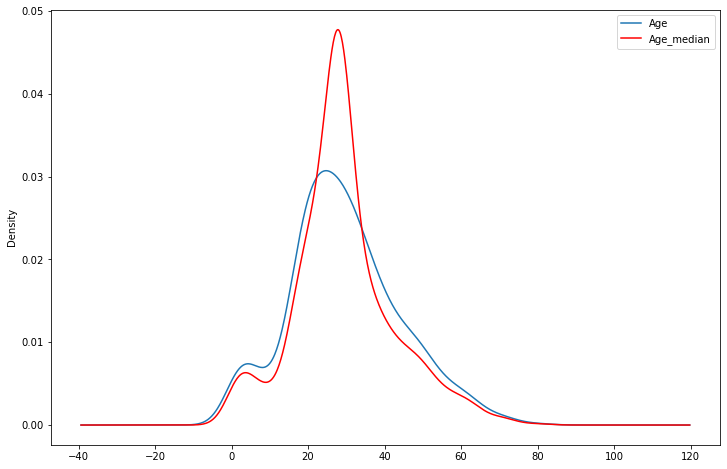

In [74]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best');

### Random Sample Imputation
- Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isnull().mean()*100   # Null values in percentage form

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [19]:
df['Age'].isnull().sum()

177

In [26]:
df['Age'].dropna().sample(random_state=42)

149    42.0
Name: Age, dtype: float64

In [31]:
df['Age'].dropna().sample(177,random_state=42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [37]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [54]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [69]:
def impute_nan(data,feature,median):
    df[feature+'_median']=df[feature].fillna(median)
    df[feature+'_random']=df[feature]
    rand_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=42)
    index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=rand_sample

In [70]:
median=df['Age'].median()

In [71]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<IPython.core.display.Javascript object>

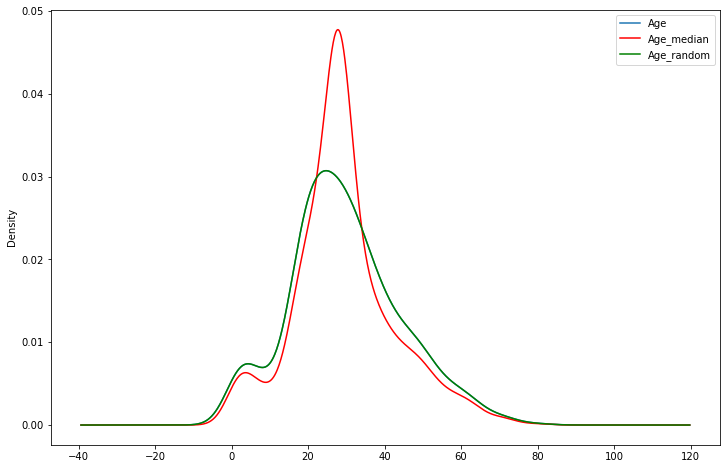

In [75]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best');

### Missing Value Indicator
- This technique involves adding a binary variable to indicate whether the value is missing for a certain observation. This variable takes the value 1 if the observation is missing, or 0 otherwise. 
- But we still need to replace the missing values in the original variable, which we tend to do with mean or median imputation. - By using these 2 techniques together, if the missing value has predictive power, it will be captured by the missing indicator, and if it doesn’t it will be masked by the mean / median imputation.

In [76]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [79]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)
df.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [83]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End of Distribution imputation
- In this method we replace missing values with far end values or extreme
- Far end value means the values after 3rd stander deviation

In [134]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


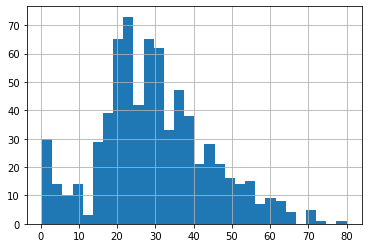

In [135]:
df.Age.hist(bins=30);

In [136]:
extreme=df.Age.mean()+3*df.Age.std()

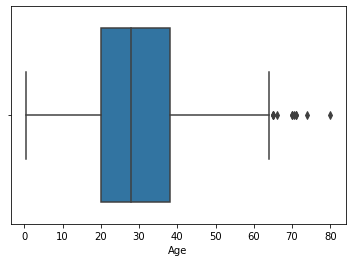

In [137]:
sns.boxplot('Age',data=df);

In [138]:
def impute_nan(data,feature,median,extreme):
    df[feature+'_end_dist']=df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)

In [139]:
impute_nan(df,'Age',median,extreme)
df.head(20)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


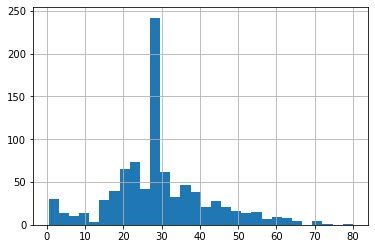

In [140]:
df['Age'].hist(bins=30);

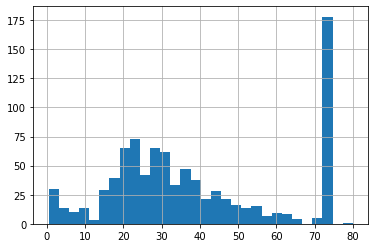

In [141]:
df['Age_end_dist'].hist(bins=30);

<AxesSubplot:xlabel='Age_end_dist'>

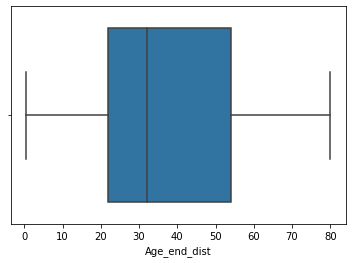

In [144]:
sns.boxplot('Age_end_dist',data=df)

### Arbitrary Value Imputation
- Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value.

- Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

- Suitable for both numerical and categorical variables

In [154]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [155]:
def impute_nan(data,feature):
    df[feature+'_zero']=df['Age'].fillna(0)
    df[feature+'_hundred']=df['Age'].fillna(100)

In [156]:
impute_nan(df,'Age')
df.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


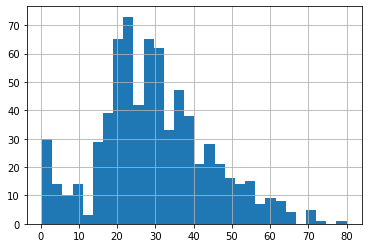

In [157]:
df['Age'].hist(bins=30);

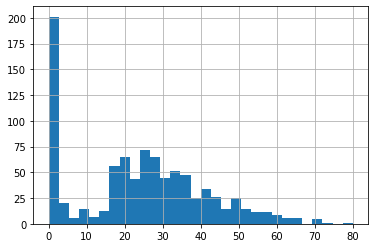

In [158]:
df['Age_zero'].hist(bins=30);

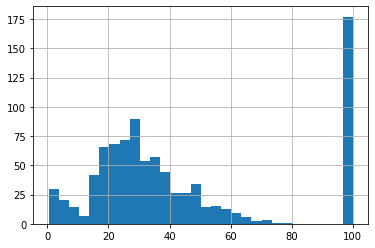

In [159]:
df['Age_hundred'].hist(bins=30);

# Categroical Missing Values

### Frequent Category Imputation
- Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. 
- The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.

In [292]:
df=pd.read_csv("HR_job.csv",usecols=["enrolled_university","education_level",'major_discipline'])
df.head()

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,NaN,Graduate,Business Degree
4,no_enrollment,Masters,STEM


In [293]:
df.shape

(19158, 3)

In [294]:
df.isnull().sum()

enrolled_university     386
education_level         460
major_discipline       2813
dtype: int64

In [295]:
df.isnull().mean().sort_values(ascending=False)*100

major_discipline       14.683161
education_level         2.401086
enrolled_university     2.014824
dtype: float64

In [296]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

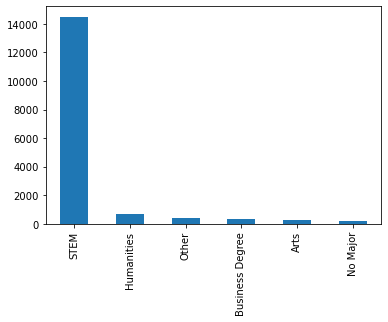

In [297]:
df['major_discipline'].value_counts().plot.bar();

In [298]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

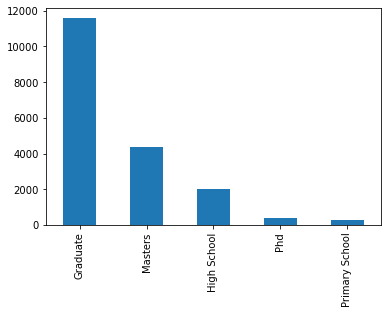

In [299]:
df['education_level'].value_counts().plot.bar();

In [300]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

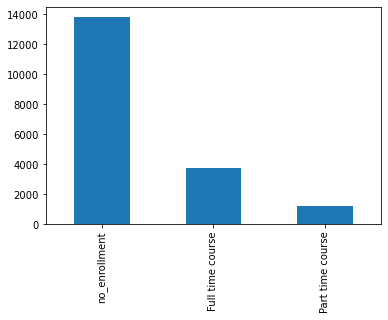

In [301]:
df['enrolled_university'].value_counts().plot.bar();

In [302]:
df['major_discipline'].value_counts().index[0]     # Mode

'STEM'

In [303]:
def impute_nan(data,feature):
    mode=df[feature].mode()[0]
    df[feature].fillna(mode,inplace=True)

In [304]:
for feature in ['enrolled_university','education_level','major_discipline']:
    impute_nan(df,feature)

In [305]:
df.head(50)

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,no_enrollment,Graduate,Business Degree
4,no_enrollment,Masters,STEM
5,Part time course,Graduate,STEM
6,no_enrollment,High School,STEM
7,no_enrollment,Graduate,STEM
8,no_enrollment,Graduate,STEM
9,no_enrollment,Graduate,STEM


In [306]:
df.isnull().sum()

enrolled_university    0
education_level        0
major_discipline       0
dtype: int64

### Adding a variable to capture NaN Values

In [269]:
df=pd.read_csv("HR_job.csv",usecols=["enrolled_university","education_level",'major_discipline'])
df.head()

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,NaN,Graduate,Business Degree
4,no_enrollment,Masters,STEM


In [270]:
df['major_discipline_nan']=np.where(df['major_discipline'].isnull(),1,0)

In [271]:
mode=df['major_discipline'].mode()[0]
df['major_discipline'].fillna(mode,inplace=True)


In [272]:
df.head(25)

,enrolled_university,education_level,major_discipline,major_discipline_nan
0,no_enrollment,Graduate,STEM,0
1,no_enrollment,Graduate,STEM,0
2,Full time course,Graduate,STEM,0
3,NaN,Graduate,Business Degree,0
4,no_enrollment,Masters,STEM,0
5,Part time course,Graduate,STEM,0
6,no_enrollment,High School,STEM,1
7,no_enrollment,Graduate,STEM,0
8,no_enrollment,Graduate,STEM,0
9,no_enrollment,Graduate,STEM,0


### Impute the Value “missing”, which treats it as a Separate Category

In [273]:
df=pd.read_csv("HR_job.csv",usecols=["enrolled_university","education_level",'major_discipline'])
df.head()

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,NaN,Graduate,Business Degree
4,no_enrollment,Masters,STEM


In [274]:
def impute_nan(data,feature):
    df[feature+'_var']=np.where(df[feature].isnull(),'Missing',df[feature])

In [278]:
for feature in ['enrolled_university','education_level','major_discipline']:
    impute_nan(df,feature)
df.head(25)

,enrolled_university,education_level,major_discipline,major_discipline_var,enrolled_university_var,education_level_var
0,no_enrollment,Graduate,STEM,STEM,no_enrollment,Graduate
1,no_enrollment,Graduate,STEM,STEM,no_enrollment,Graduate
2,Full time course,Graduate,STEM,STEM,Full time course,Graduate
3,NaN,Graduate,Business Degree,Business Degree,Missing,Graduate
4,no_enrollment,Masters,STEM,STEM,no_enrollment,Masters
5,Part time course,Graduate,STEM,STEM,Part time course,Graduate
6,no_enrollment,High School,NaN,Missing,no_enrollment,High School
7,no_enrollment,Graduate,STEM,STEM,no_enrollment,Graduate
8,no_enrollment,Graduate,STEM,STEM,no_enrollment,Graduate
9,no_enrollment,Graduate,STEM,STEM,no_enrollment,Graduate


In [281]:
df=df.drop(['enrolled_university','education_level','major_discipline'],axis=1)
df.head(25)

,major_discipline_var,enrolled_university_var,education_level_var
0,STEM,no_enrollment,Graduate
1,STEM,no_enrollment,Graduate
2,STEM,Full time course,Graduate
3,Business Degree,Missing,Graduate
4,STEM,no_enrollment,Masters
5,STEM,Part time course,Graduate
6,Missing,no_enrollment,High School
7,STEM,no_enrollment,Graduate
8,STEM,no_enrollment,Graduate
9,STEM,no_enrollment,Graduate


# Imputation of Missing Value Using sci-kit learn Library

### Univariate Approach

- In a Univariate approach, only a single feature is taken into consideration. 
- You can use the class SimpleImputer and replace the missing values with mean, mode, median or some constant value.

In [307]:
df=pd.read_csv("HR_job.csv",usecols=["enrolled_university","education_level",'major_discipline'])
df.head()

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,NaN,Graduate,Business Degree
4,no_enrollment,Masters,STEM


In [308]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None)

In [310]:
for feature in ['enrolled_university','education_level','major_discipline']:
    df[feature]=imputer.fit_transform(df[[feature]])

In [311]:
df.head(25)

,enrolled_university,education_level,major_discipline
0,no_enrollment,Graduate,STEM
1,no_enrollment,Graduate,STEM
2,Full time course,Graduate,STEM
3,no_enrollment,Graduate,Business Degree
4,no_enrollment,Masters,STEM
5,Part time course,Graduate,STEM
6,no_enrollment,High School,STEM
7,no_enrollment,Graduate,STEM
8,no_enrollment,Graduate,STEM
9,no_enrollment,Graduate,STEM


### Multivariate Approach

- In a multivariate approach, more than one feature is taken into consideration. 
- There are two ways to impute missing values considering the multivariate approach. 
- Using KNNImputer or IterativeImputer classes.

In [ ]:
cols = ['SibSp', 'Fare', 'Age']

In [318]:
df=pd.read_csv('titanic.csv',usecols=['SibSp', 'Fare', 'Age'])
df.head()

,Age,SibSp,Fare
0,22.0,1,7.2500
1,38.0,1,71.2833
2,26.0,0,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [319]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(df)

array([[22.        ,  1.        ,  7.25      ],
       [38.        ,  1.        , 71.2833    ],
       [26.        ,  0.        ,  7.925     ],
       ...,
       [26.82938751,  1.        , 23.45      ],
       [26.        ,  0.        , 30.        ],
       [32.        ,  0.        ,  7.75      ]])

Let’s see how IterativeImputer works. For all rows, in which ‘Age’ is not missing sci-kit learn runs a regression model. It uses ‘Sib sp’ and ‘Fare’ as the features and ‘Age’ as the target. And then for all rows for which ‘Age’ is missing, it makes predictions for ‘Age’ by passing ‘Sib sp’ and ‘Fare’ to the training model. So it actually builds a regression model with two features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

### Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

In [320]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(df)

array([[22.    ,  1.    ,  7.25  ],
       [38.    ,  1.    , 71.2833],
       [26.    ,  0.    ,  7.925 ],
       ...,
       [29.    ,  1.    , 23.45  ],
       [26.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  7.75  ]])

In the above example, the n_neighbors=2. So sci-kit learn finds the two most similar rows measured by how close the ‘Sib sp’ and ‘Fare’ values are to the row which has missing values. In this case, the last row has a missing value. And the third row and the fifth row have the closest values for the other two features. So the average of the ‘Age’ feature from these two rows is taken as the imputed value.

### End Notes
- It is critical to reduce the potential bias in the machine learning models and get the precise statistical analysis of the data.
- Handling missing values is one of the challenges of data analysis.
- Understanding different categories of missing data help in making decisions on how to handle it.
- Different categories of missing data have been explored and the different ways of handling it in this notebook.
- Missing values handling is a gigantic topic. In any case, it’s very important to understand the data well and why it’s missing, talk to the experts if possible to figure out what’s going on with the data before blindly following any of the above methods.
